### Prepare Programming Environment

In [40]:
# Import libraries
import pandas as pd # Dataframe
import numpy as np # Math
import seaborn as sns # Graphs
import matplotlib.pyplot as plt # Graphs
import random # Randomness
import numpy as np # Math
from sklearn import svm # Support Vector Machines
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, validation_curve, StratifiedKFold # Model tunning
from sklearn.preprocessing import StandardScaler # Preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Model Evaluation

sd = 11

random.seed(sd)
np.random.seed(sd)

# 66 -> F1:0.75, A:0.82
# 1 -> F1:0.76, A:0.82
# 11 -> F1:>0.76, A:0.82

In [41]:
# Load dataset: Iris
X = pd.read_csv("X_train_C.csv")
X.set_index(X.columns[0], inplace=True)
X.head()

,Pclass,Sex,Age,C,Q,MT,NT,PT,Family_Size
PassengerId,,,,,,,,,
1,1,1,-0.559038,0,0,0,0,0,0.059160
2,3,0,0.648087,1,0,0,0,0,0.059160
3,1,0,-0.257257,0,0,0,0,0,-0.560975
4,3,0,0.421751,0,0,0,0,0,0.059160
5,1,1,0.421751,0,0,0,0,0,-0.560975


In [42]:
y = pd.read_csv("y_train_C.csv")
y.set_index(y.columns[0], inplace=True)

y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [43]:
# Split the dataset into features and targets
y = y["Survived"].to_numpy()
X = X.to_numpy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Modeling

In [45]:
# Define cross validation grid
cv_grid_pre = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
    "coef0": [0.0, 0.1, 0.5, 1.0]  # Only relevant for 'poly' and 'sigmoid' kernels
}

# Define the cross validation strategy | 5-Folds 
cv_pre = StratifiedKFold(n_splits = 5, shuffle = True, random_state = sd)


In [46]:
# Initialize the SVM model
pre_model = svm.SVC(random_state = sd)

In [47]:
# Perform cross validation grid search 
improve_model = GridSearchCV(estimator=pre_model, param_grid=cv_grid_pre, cv=cv_pre, scoring="f1", refit=True, n_jobs=-1)
improve_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=SVC(random_state=11), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'coef0': [0.0, 0.1, 0.5, 1.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [48]:
improve_model.best_params_

{'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [49]:
y_pred = improve_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       118
           1       0.85      0.77      0.81        61

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.88       179



In [50]:
# Define cross validation grid
cv_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, "scale", "auto"],
    'class_weight': ["balanced", None]
}

# Define the cross validation strategy | 5-Folds 
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = sd)

In [51]:
# Initialize the SVM model
model = svm.SVC(kernel = "rbf", random_state = sd)

In [52]:
# Perform cross validation grid search 
best_model = GridSearchCV(estimator=model, param_grid=cv_grid, cv=cv, scoring="f1", refit=True, n_jobs=-1)
best_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=SVC(random_state=11), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto']},
             scoring='f1')

In [53]:
best_model.best_params_

{'C': 1, 'class_weight': None, 'gamma': 'scale'}

### Evaluation

In [54]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       118
           1       0.85      0.77      0.81        61

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.88       179



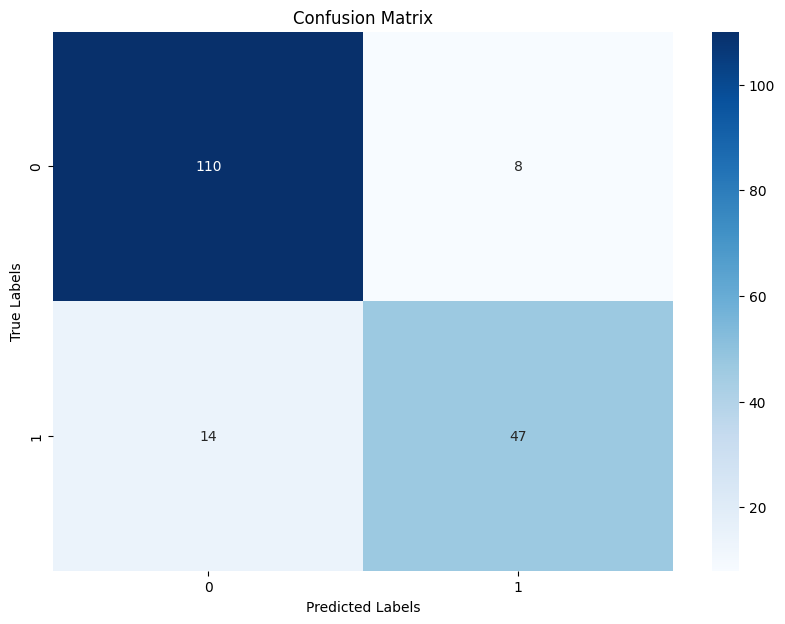

In [55]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Predictions for Kaggle Submition

In [56]:
X_kaggle = pd.read_csv("X_test_C.csv")
X_kaggle_test = X_kaggle.drop("PassengerId", axis = 1)
X_kaggle_test.head()

,Pclass,Sex,Age,C,Q,Dona,MT,PT,Family_Size
0,1,1,0.384029,0,1,0,0,0,-0.560975
1,1,0,1.327096,0,0,0,0,0,0.059160
2,2,1,2.458776,0,1,0,0,0,-0.560975
3,1,1,-0.181811,0,0,0,0,0,-0.560975
4,1,0,-0.559038,0,0,0,0,0,0.679295


In [57]:
y_kaggle_pred = best_model.predict(X_kaggle_test)

d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [58]:
kaggle_evaluation = pd.DataFrame(X_kaggle["PassengerId"].copy())
kaggle_evaluation["Survived"] = y_kaggle_pred
kaggle_evaluation.set_index(kaggle_evaluation.columns[0], inplace=True)
kaggle_evaluation.to_csv("Submition_titatnic.csv")
kaggle_evaluation.head()


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
